### Initialize data

In [1]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*') # Silence RDKit warnings

import pandas as pd
df = pd.read_excel('dataset.xlsx')
df[['Ligand Name','SMILES', 'Ni conc [mM]', 'Sample ID', 'max h2 (umol)']]

,Ligand Name,SMILES,Ni conc [mM],Sample ID,max h2 (umol)
0,"1,2-Benzenedithiol",[S-]c1ccccc1[S-],0.025,L10,0.281460
1,triphenylphosphine,c1ccc(cc1)P(c2ccccc2)c3ccccc3,0.025,L11,0.058493
2,"1,2-bis(dicyclohexylphosphino)ethane",C1CCC(CC1)P(CCP(C2CCCCC2)C3CCCCC3)C4CCCCC4,0.025,L12,0.390512
3,2-Mercaptonicotinic acid,[O-]C(=O)c1cccnc1[S-],0.025,L2,4.068596
4,3-Aminopyridine-2(1H)-thione,C1=CNC(=S)C(=C1)N,0.025,L3,9.021096
...,...,...,...,...,...
499,"4,5-dichloro-o-phenylenediamine",Nc1cc(Cl)c(Cl)cc1N,0.700,L53,0.157703
500,"N,N'-diphenyl-p-phenylenediamine",N(c1ccccc1)c2ccc(Nc3ccccc3)cc2,0.700,L54,0.011934
501,3-mercaptopropionic acid,OC(=O)CCS,0.700,L55,11.290852
502,"3,3,3 triphenyl propionic acid",OC(=O)CC(c1ccccc1)(c2ccccc2)c3ccccc3,0.700,L56,0.218561


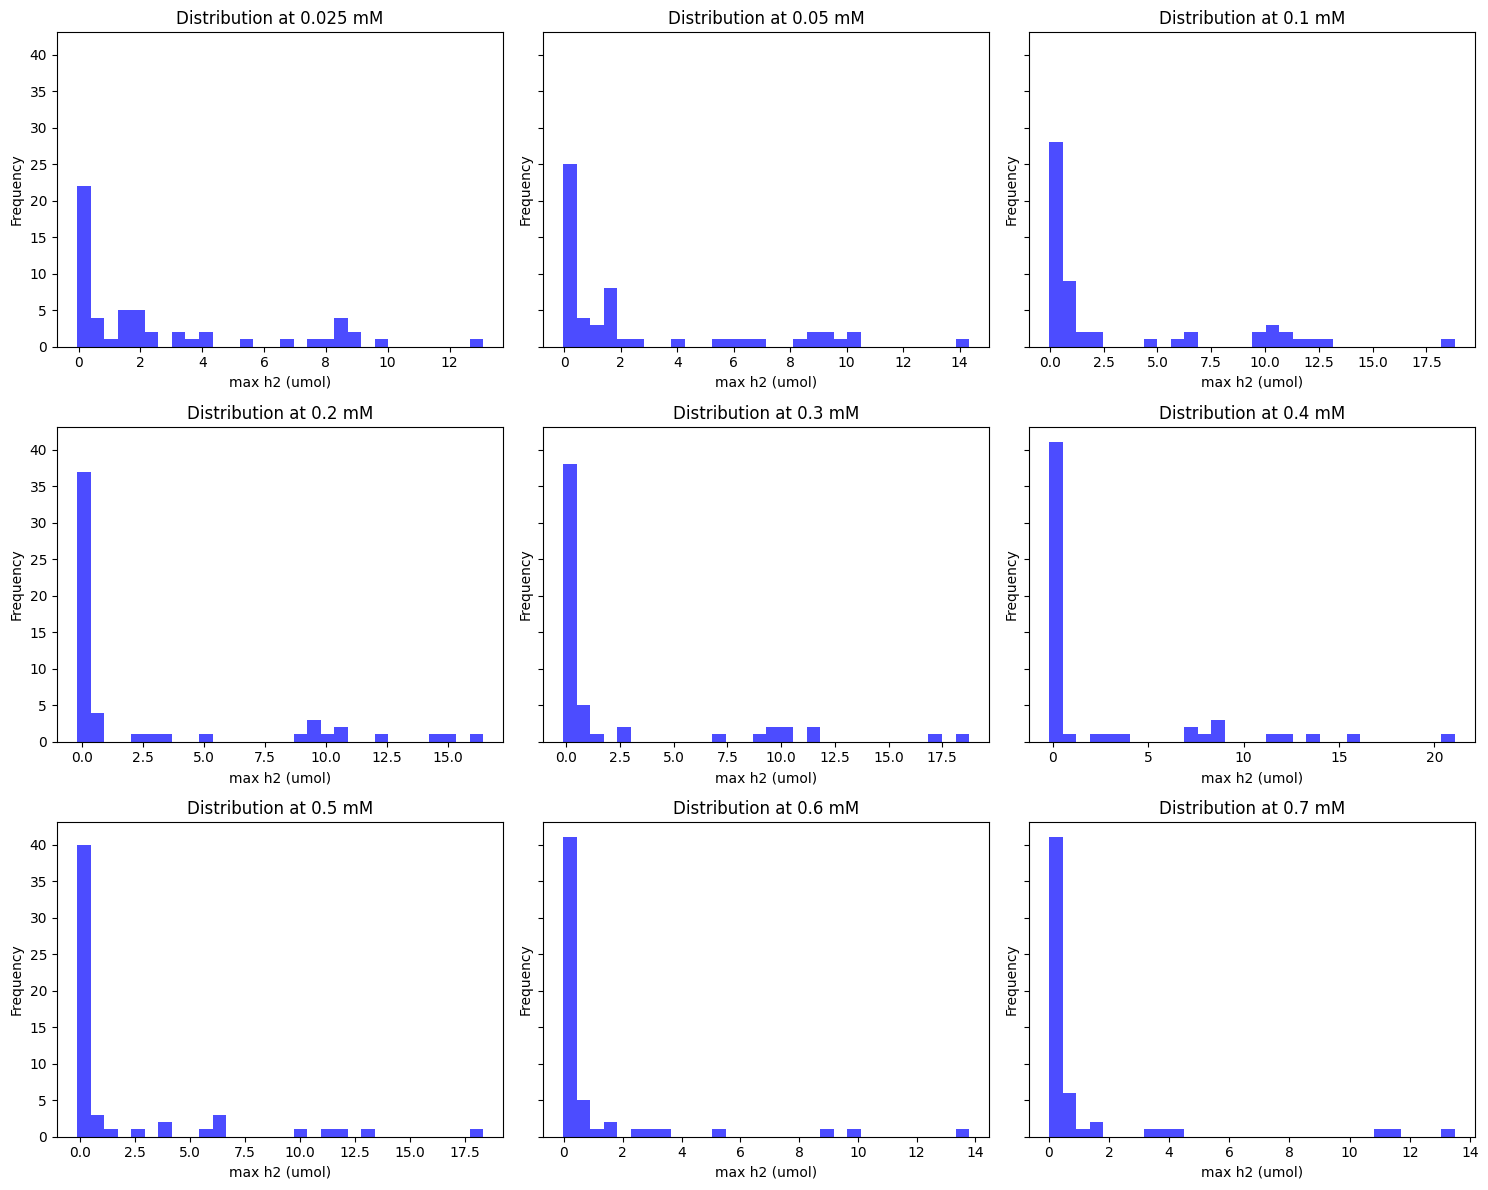

In [2]:
import matplotlib.pyplot as plt

concentrations = df['Ni conc [mM]'].unique()
n_conc = len(concentrations)

fig, axes = plt.subplots(3, 3, figsize=(15, 12), sharey=True)
axes = axes.flatten()

for i, conc in enumerate(concentrations):
    ax = axes[i]
    subset = df[df['Ni conc [mM]'] == conc]
    subset['max h2 (umol)'].hist(bins=30, grid=False, color='blue', alpha=0.7, ax=ax)
    ax.set_xlabel('max h2 (umol)')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution at {conc} mM')

# Hide unused subplots if any
for j in range(len(concentrations), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [3]:
import pandas as pd

# Summary statistics for each concentration as a pandas DataFrame

stats_data = []
for conc in sorted(concentrations):
    subset = df[df['Ni conc [mM]'] == conc]
    h2_vals = subset['max h2 (umol)']
    stats_data.append({
        'Concentration (mM)': conc,
        'Count': len(h2_vals),
        'Mean (μmol)': h2_vals.mean(),
        'Std (μmol)': h2_vals.std(),
        'Min (μmol)': h2_vals.min(),
        'Max (μmol)': h2_vals.max(),
        'Non-zero count': (h2_vals > 0).sum(),
        'Coefficient of Variation': h2_vals.std() / h2_vals.mean()
    })

stats_df = pd.DataFrame(stats_data)
stats_df

,Concentration (mM),Count,Mean (μmol),Std (μmol),Min (μmol),Max (μmol),Non-zero count,Coefficient of Variation
0,0.025,56,2.674816,3.365995,-0.042683,13.085681,55,1.258402
1,0.050,56,2.603952,3.653703,-0.042815,14.336694,55,1.403137
2,0.100,56,3.015525,4.610920,-0.033609,18.832912,54,1.529060
3,0.200,56,2.648345,4.681023,-0.195419,16.425882,53,1.767528
4,0.300,56,2.314391,4.562441,-0.152435,18.751163,49,1.971336
5,0.400,56,2.477710,4.740133,-0.195419,21.083450,51,1.913111
6,0.500,56,1.948237,3.921194,-0.113090,18.336289,48,2.012688
7,0.600,56,1.099250,2.558193,-0.026901,13.784412,54,2.327218
8,0.700,56,1.155022,2.724836,0.011934,13.504761,56,2.359120


In [4]:
# Filter out ligands with no activity
df_filtered = df[df['max h2 (umol)'] >= 0.5]
#df_filtered = df
df_filtered

,Ligand Name,CAS,SMILES,Sample ID,Ni conc [mM],Well Row (0-indexed),Well Column (0-indexed),0,30,60,...,870,900,930,960,990,1020,1050,1080,1110,max h2 (umol)
3,2-Mercaptonicotinic acid,38521-46-9,[O-]C(=O)c1cccnc1[S-],L2,0.025,0,1,-0.195419,-0.019767,0.265820,...,1.974575,2.286667,2.415076,2.699777,2.932207,3.241801,3.465248,3.753974,4.068596,4.068596
4,3-Aminopyridine-2(1H)-thione,38240-21-0,C1=CNC(=S)C(=C1)N,L3,0.025,0,2,-0.195419,-0.139284,0.037127,...,3.927982,4.563381,5.013864,5.565616,6.171127,6.913282,7.537440,8.266589,9.021096,9.021096
5,2-Mercapto-6-methylpyridine,18368-57-5,Cc1cccc(S)n1,L4,0.025,0,3,-0.195419,-0.027155,-0.004378,...,4.041246,4.600444,5.106469,5.592967,6.145826,6.787368,7.238966,7.978657,8.495097,8.495097
6,3-Bromo-6-mercaptopyridine,56673-34-8,C1=CC(=S)NC=C1Br,L5,0.025,0,4,-0.195419,-0.090234,-0.166809,...,3.526215,4.007917,4.395415,4.857900,5.318898,5.835322,6.362200,6.960343,7.491785,7.491785
7,6-Mercaptonicotinonitrile,27885-58-1,C1=CC(=S)NC=C1C#N,L6,0.025,0,5,-0.195419,-0.086162,-0.071547,...,4.137825,4.678774,5.134172,5.681852,6.232149,6.811899,7.343442,8.064902,8.625834,8.625834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,Ethyl piperidine-3-carboxylate,5006-62-2,CCOC(=O)C1CCCNC1,L35,0.700,8,1,-0.195419,0.066474,0.368405,...,0.492288,0.489264,0.471846,0.552176,0.370059,0.512858,0.456206,0.393621,0.473770,0.555013
482,"2,2′-Bipyridyl",366-18-7,c1ccc(nc1)c2ccccn2,L36,0.700,8,2,-0.195419,0.176814,0.513108,...,0.607341,0.546359,0.565758,0.595526,0.468779,0.606608,0.523284,0.494987,0.487824,0.659100
489,"1,3,5 benzene tricarboxylic acid",554-95-0,OC(=O)c1cc(cc(c1)C(O)=O)C(O)=O,L43,0.700,8,9,-0.195419,0.220902,0.570997,...,0.700215,0.771225,0.779157,0.782251,0.629324,0.737090,0.675573,0.658206,0.740157,0.822929
501,3-mercaptopropionic acid,107-96-0,OC(=O)CCS,L55,0.700,8,10,-0.195419,-0.104664,-0.017845,...,5.640240,6.359960,7.091426,7.613325,8.380821,9.175294,9.741481,10.463428,11.290852,11.290852


In [5]:
from rdkit import Chem
smiles = df['SMILES'].unique().tolist()
mols = [Chem.MolFromSmiles(s) for s in smiles]
mol_names = df['Ligand Name'].unique().tolist()
mol_dict = {mol_names[i]: smiles[i] for i in range(len(smiles))}

In [6]:
from utils.utils import generate_fingerprints, calculate_descriptors

# Fingerprints
fp_results = []
for i in range(len(mols)):
    fp = generate_fingerprints(mols[i])
    fp_results.append(fp)

# Moelcular descriptors (rdkit)
from utils.utils import calculate_descriptors
    
# Calculate descriptors for our ligand dataset
descriptor_data = []
for name, smiles in mol_dict.items():
    mol = Chem.MolFromSmiles(smiles)
    desc = calculate_descriptors(mol, name)
    descriptor_data.append(desc)

df_desc = pd.DataFrame(descriptor_data)

### Preliminary ML models

We will start with the following models:
1. Linear Regression (ElasticNet)
2. Random Forest
3. SVR
4. Guassian Process

In [7]:
# Use concentrations corresponding to max H2 production for each ligand

# Use all concentrations for all ligands
df_model = df_filtered[['Ligand Name', 'max h2 (umol)', 'Ni conc [mM]']]
print(f'Shape of df_model: {df_model.shape}')

# Use one concentration for all ligands
df_model_01 = df_model[df_model['Ni conc [mM]'] == 0.1]
print(f'Shape of df_model_01: {df_model_01.shape}')
df_model_01.head()

Shape of df_model: (181, 3)
Shape of df_model_01: (28, 3)


,Ligand Name,max h2 (umol),Ni conc [mM]
112,"1,2-Benzenedithiol",0.706525,0.1
115,2-Mercaptonicotinic acid,10.366413,0.1
116,3-Aminopyridine-2(1H)-thione,6.285898,0.1
117,2-Mercapto-6-methylpyridine,11.916718,0.1
118,3-Bromo-6-mercaptopyridine,10.921355,0.1


Merge molecular descriptors with experimental data

In [8]:
import numpy as np

# Merge molecular descriptors with experimental data
ml_data = df_model_01.set_index('Ligand Name').join(df_desc.set_index('Name'))
ml_data.reset_index(inplace=True)
print(ml_data.shape)

# Add fingerprint features (using your existing fp_results)
fingerprint_features = []
for i, name in enumerate(mol_names):
    fp_data = {'Ligand Name': name}
    
    # Use Morgan fingerprint bits (first 50 most variable bits)
    morgan_bits = np.array(fp_results[i]['Morgan'])
    # Select bits with some variance
    bit_variance = []
    for bit_idx, bit_val in enumerate(morgan_bits):
        # This is simplified - in practice, calculate variance across all molecules
        fp_data[f'morgan_bit_{bit_idx}'] = bit_val
    
    fingerprint_features.append(fp_data)

fp_df = pd.DataFrame(fingerprint_features)
ml_data = ml_data.merge(fp_df, on='Ligand Name', how='left')

print(ml_data.shape)
pd.set_option('display.max_columns', None)
ml_data.head()

(28, 220)
(28, 2268)


Ligand Name  max h2 (umol)  Ni conc [mM]  \
0            1,2-Benzenedithiol       0.706525           0.1   
1      2-Mercaptonicotinic acid      10.366413           0.1   
2  3-Aminopyridine-2(1H)-thione       6.285898           0.1   
3   2-Mercapto-6-methylpyridine      11.916718           0.1   
4    3-Bromo-6-mercaptopyridine      10.921355           0.1   

   MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
0           4.849074        4.849074           0.766204        0.766204   
1          10.203981       10.203981           0.030093       -1.279537   
2           5.384398        5.384398           0.604167        0.604167   
3           4.042994        4.042994           0.782407        0.782407   
4           4.795278        4.795278           0.757593        0.757593   

        qed    SPS    MolWt  HeavyAtomMolWt  ExactMolWt  NumValenceElectrons  \
0  0.500796  9.000  140.232         136.200  139.976539                   42   
1  0.503007  9.200  153.162         150.138  152.989546                   52   
2  0.514742  9.000  126.184         120.136  126.025169                   42   
3  0.520394  9.250  125.196         118.140  125.029920                   42   
4  0.621121  9.125  190.065         186.033  188.924782                   42   

   NumRadicalElectrons  MaxPartialCharge  MinPartialCharge  \
0                    0         -0.063856         -0.781082   
1                    0          0.071478         -0.759551   
2                    0          0.125988         -0.396337   
3                    0          0.093203         -0.247099   
4                    0          0.102769         -0.351773   

   MaxAbsPartialCharge  MinAbsPartialCharge  FpDensityMorgan1  \
0             0.781082             0.063856             0.875   
1             0.759551             0.071478             1.700   
2             0.396337             0.125988             1.625   
3             0.247099             0.093203             1.500   
4             0.351773             0.102769             1.500   

   FpDensityMorgan2  FpDensityMorgan3  BCUT2D_MWHI  BCUT2D_MWLOW  \
0             1.250             1.500    32.120036     10.363192   
1             2.400             2.800    32.116921     10.283593   
2             2.375             2.750    32.091993     10.440586   
3             2.250             2.625    32.116920     10.388832   
4             2.250             2.625    79.918731     10.512661   

   BCUT2D_CHGHI  BCUT2D_CHGLO  BCUT2D_LOGPHI  BCUT2D_LOGPLOW  BCUT2D_MRHI  \
0      1.678163     -2.161606       2.036896       -1.730154     7.618950   
1      1.896592     -2.106985       2.005033       -2.228056     7.583126   
2      1.797587     -1.868163       1.972955       -1.849583     7.711953   
3      1.825238     -1.887992       1.998545       -1.773603     7.797546   
4      1.778363     -1.836013       2.037651       -1.686580     9.102976   

   BCUT2D_MRLOW    AvgIpc  BalabanJ     BertzCT      Chi0     Chi0n     Chi0v  \
0      1.266056  1.768177  3.134862  162.638339  5.983128  4.125898  5.758891   
1     -0.254898  1.878745  3.152941  261.679658  7.560478  4.904009  5.720506   
2      1.303289  1.768177  3.346607  227.870321  5.983128  4.217649  5.034146   
3      1.071164  1.642371  3.077660  168.388339  5.983128  4.626478  5.520905   
4      1.281364  1.769973  3.223015  209.620321  5.983128  4.018264  6.420757   

       Chi1     Chi1n     Chi1v     Chi2n     Chi2v     Chi3n     Chi3v  \
0  3.804530  2.235599  3.052095  1.446735  2.326388  0.849162  1.690363   
1  4.715214  2.549520  2.957768  1.643573  2.030271  0.991069  1.316392   
2  3.804530  2.236816  2.645065  1.454587  1.862835  0.848625  1.202178   
3  3.787694  2.414837  2.862051  1.637167  2.095366  0.873626  1.122698   
4  3.787694  2.131140  3.332387  1.371144  2.726646  0.746243  1.493428   

      Chi4n     Chi4v  HallKierAlpha         Ipc    Kappa1    Kappa2  \
0  0.450170  0.743388          -0.34   72.495266  5.79054

### Preprocessing and data initialization
Prepare features for training. Will start with just molecular descriptors (excluding substructure descriptors), then consider fingerprints (This was considered but it did not appear to provide any significant increase in predictive performance).

In [9]:
from sklearn.model_selection import train_test_split

# Sublist for feature groups (molecular, substructure, fingerprint)
molecular_cols = df_desc.columns.tolist()
molecular_cols.remove('Name')
fingerprint_cols = [col for col in ml_data.columns if 'morgan_bit_' in col]

# Select columns for features
#feature_cols = molecular_cols + fingerprint_cols
feature_cols = molecular_cols

# Prepare features using only molecular descriptors first
X = ml_data[feature_cols]
y = ml_data['max h2 (umol)']

print(f"Features: {len(feature_cols)}")
print(f"Samples: {len(X)}")
print(f"Target distribution: mean={y.mean():.2f}, std={y.std():.2f}")

Features: 217
Samples: 28
Target distribution: mean=5.86, std=5.15


### Feature Engineering and Correlation Analysis
Remove highly correlated features and select most important features to reduce overfitting

In [10]:
# Check for and remove constant features (zero variance)
X_features_check = ml_data[feature_cols]
feature_variances = X_features_check.var()

# Find features with zero or near-zero variance
zero_var_features = feature_variances[feature_variances < 1e-10].index.tolist()

if zero_var_features:
    print(f"Found {len(zero_var_features)} constant/near-constant features:")
    # for feat in zero_var_features:
    #     print(f"  - {feat} (variance: {feature_variances[feat]:.2e})")
    
    # Remove these features
    feature_cols = [col for col in feature_cols if col not in zero_var_features]
    print(f"\nRemoved constant features. Remaining features: {len(feature_cols)}")
else:
    print("No constant features found. All features have variance.")

print(f"\nFinal feature count for correlation analysis: {len(feature_cols)}")

Found 62 constant/near-constant features:

Removed constant features. Remaining features: 155

Final feature count for correlation analysis: 155


Correlation-Based Selection:
  Original features: 155
  Features dropped: 56
  Features kept: 99


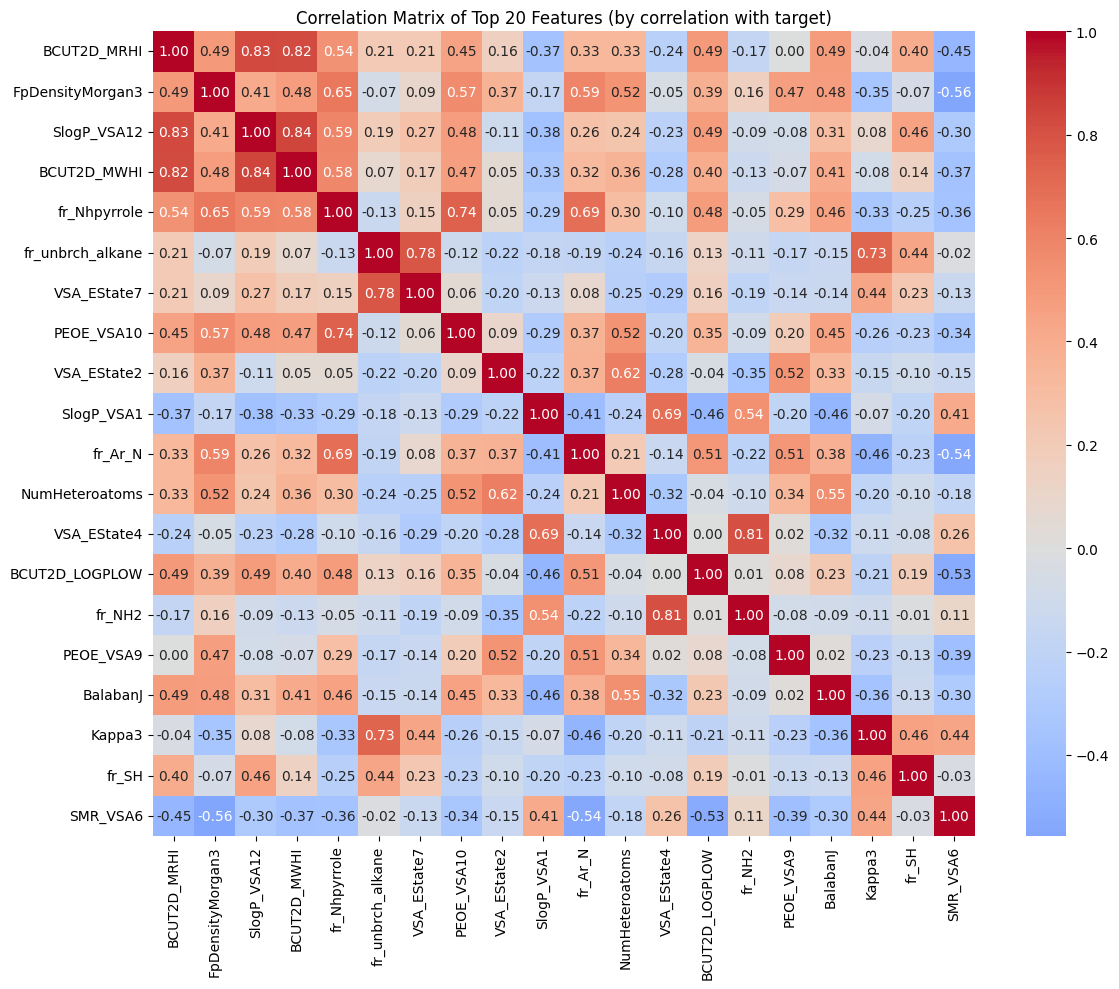

In [11]:
# Correlation-based selection: Keep best feature from each correlated group
import seaborn as sns

X_features = ml_data[feature_cols]
correlation_matrix = X_features.corr().abs()

# Calculate correlation with target for all features
target_correlations = X_features.corrwith(ml_data['max h2 (umol)']).abs()

# Find groups of correlated features
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

# Track which features to keep
features_to_keep = set(feature_cols)
features_to_drop_improved = set()

# For each pair of highly correlated features, keep the one more correlated with target
for i in range(len(upper_triangle.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i, j] > 0.9:
            feat_i = upper_triangle.columns[i]
            feat_j = upper_triangle.columns[j]
            
            # Keep the feature with higher correlation to target
            if target_correlations[feat_i] >= target_correlations[feat_j]:
                if feat_j in features_to_keep:
                    features_to_drop_improved.add(feat_j)
            else:
                if feat_i in features_to_keep:
                    features_to_drop_improved.add(feat_i)

# Remove dropped features
features_to_keep = features_to_keep - features_to_drop_improved
feature_cols_reduced = sorted(list(features_to_keep))

print(f"Correlation-Based Selection:")
print(f"  Original features: {len(feature_cols)}")
print(f"  Features dropped: {len(features_to_drop_improved)}")
print(f"  Features kept: {len(feature_cols_reduced)}")

# Visualize correlation matrix of reduced features (top 20 if many features)
if len(feature_cols_reduced) > 20:
    # Show only top 20 features by correlation with target
    correlations_with_target = X_features[feature_cols_reduced].corrwith(ml_data['max h2 (umol)']).abs()
    correlations_with_target = correlations_with_target.fillna(0)
    top_features = correlations_with_target.nlargest(20).index.tolist()
    plt.figure(figsize=(12, 10))
    sns.heatmap(X_features[top_features].corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Top 20 Features (by correlation with target)')
else:
    plt.figure(figsize=(12, 10))
    sns.heatmap(X_features[feature_cols_reduced].corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Reduced Features')

plt.tight_layout()
plt.show()

In [12]:
# 2. Select top features based on correlation with target
# Calculate correlation with target
correlations_with_target = X_features[feature_cols_reduced].corrwith(ml_data['max h2 (umol)']).abs()
correlations_sorted = correlations_with_target.sort_values(ascending=False)

print("Top 10 features by correlation with target:")
print("=" * 60)
print(correlations_sorted.head(10))

# Select top 10 features
top_n_features = 10
feature_cols_selected = correlations_sorted.head(top_n_features).index.tolist()

Top 10 features by correlation with target:
BCUT2D_MRHI         0.635896
FpDensityMorgan3    0.610142
SlogP_VSA12         0.541385
BCUT2D_MWHI         0.493666
fr_Nhpyrrole        0.487822
fr_unbrch_alkane    0.487002
VSA_EState7         0.471071
PEOE_VSA10          0.439701
VSA_EState2         0.398987
SlogP_VSA1          0.393693
dtype: float64


#### Feature Descriptions

Brief descriptions of the top 10 selected molecular descriptors:

1. **BCUT2D_MRHI**: BCUT descriptor using molar refractivity (highest value) - measures molecular polarizability and size
2. **FpDensityMorgan3**: Morgan fingerprint density - indicates molecular complexity and structural diversity
3. **SlogP_VSA12**: SlogP-based van der Waals surface area (bin 12) - hydrophobic surface area in the highest SlogP range
4. **BCUT2D_MWHI**: BCUT descriptor using molecular weight (highest value) - measures molecular size and weight distribution
5. **fr_Nhpyrrole**: Number of N-substituted pyrrole rings - counts nitrogen-containing heterocyclic rings
6. **fr_unbrch_alkane**: Number of unbranched alkane chains - measures linear carbon chain fragments
7. **VSA_EState7**: Van der Waals surface area weighted by EState (bin 7) - electrotopological surface area in mid-range
8. **PEOE_VSA10**: Partial equalization of orbital electronegativities VSA (bin 10) - electronegativity-weighted surface area
9. **VSA_EState2**: Van der Waals surface area weighted by EState (bin 2) - electrotopological surface area in low range
10. **SlogP_VSA1**: SlogP-based van der Waals surface area (bin 1) - hydrophobic surface area in the lowest SlogP range

#### Updated Preprocessing with Selected Features and Standardization

In [13]:
# 3. Prepare features with selected features
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Use selected features
X = ml_data[feature_cols_selected]
y = ml_data['max h2 (umol)']

# Split the data (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Fit scaler on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Selected Features: {len(feature_cols_selected)}")
print(f"Total Samples: {len(X)}")
print(f"Training Samples: {len(X_train)}")
print(f"Test Samples: {len(X_test)}")
print(f"Target distribution: mean={y.mean():.2f}, std={y.std():.2f}")

Selected Features: 10
Total Samples: 28
Training Samples: 22
Test Samples: 6
Target distribution: mean=5.86, std=5.15


#### Build and evaluate models

In [14]:
# 4. Build and evaluate models with improved cross-validation
import numpy as np
from sklearn.ensemble import  RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline

# Use models appropriate for smaller datasets
models = {
    # 'Ridge': Pipeline([
    #     ('scaler', StandardScaler()),
    #     ('regressor', Ridge(alpha=1.0))
    # ]),
    # 'Lasso': Pipeline([
    #     ('scaler', StandardScaler()),
    #     ('regressor', Lasso(alpha=0.1, max_iter=5000))
    # ]),
    'ElasticNet': Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=5000))
    ]),
    'Random Forest': RandomForestRegressor(
        n_estimators=50,
        max_depth=3, 
        min_samples_split=5,
        min_samples_leaf=3,
        max_features='sqrt',
        random_state=21
    ),
    'SVR': Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', SVR(kernel='poly', C=1.0, gamma='scale', epsilon=0.3))
    ]),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=20, max_depth=10, learning_rate=0.1, random_state=21),
    #'Gaussian Process': GaussianProcessRegressor(alpha=1, n_restarts_optimizer=5, normalize_y=True, random_state=21)
}

results = {}

for name, model in models.items():
    
    # Fit model on training data (already scaled via pipeline or raw for RF)
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Cross-validation on training set
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    
    # Store results
    results[name] = {
        'train_r2': r2_score(y_train, y_pred_train),
        'test_r2': r2_score(y_test, y_pred_test),
        'cv_r2_mean': cv_scores.mean(),
        'cv_r2_std': cv_scores.std(),
        'test_mae': mean_absolute_error(y_test, y_pred_test),
        'test_rmse': np.sqrt(mean_squared_error(y_test, y_pred_test))
    }

# Display results
results_df = pd.DataFrame(results).T
print("="*80)
print("Model Performance Comparison:")
print("="*80)
print(results_df.round(3))

Model Performance Comparison:
                   train_r2  test_r2  cv_r2_mean  cv_r2_std  test_mae  \
ElasticNet            0.869    0.729      -1.691      2.825     2.064   
Random Forest         0.598    0.781      -3.900      7.665     1.964   
SVR                   0.474    0.538     -10.261     20.194     2.344   
Gradient Boosting     0.985    0.672      -4.768      8.199     1.688   

                   test_rmse  
ElasticNet             2.471  
Random Forest          2.218  
SVR                    3.225  
Gradient Boosting      2.717  


#### Display heatmap for feature importance

Processing ElasticNet...
Processing Random Forest...
Processing SVR...
Processing Gradient Boosting...

Feature importances calculated for 4 models:
['ElasticNet', 'Random Forest', 'SVR', 'Gradient Boosting']


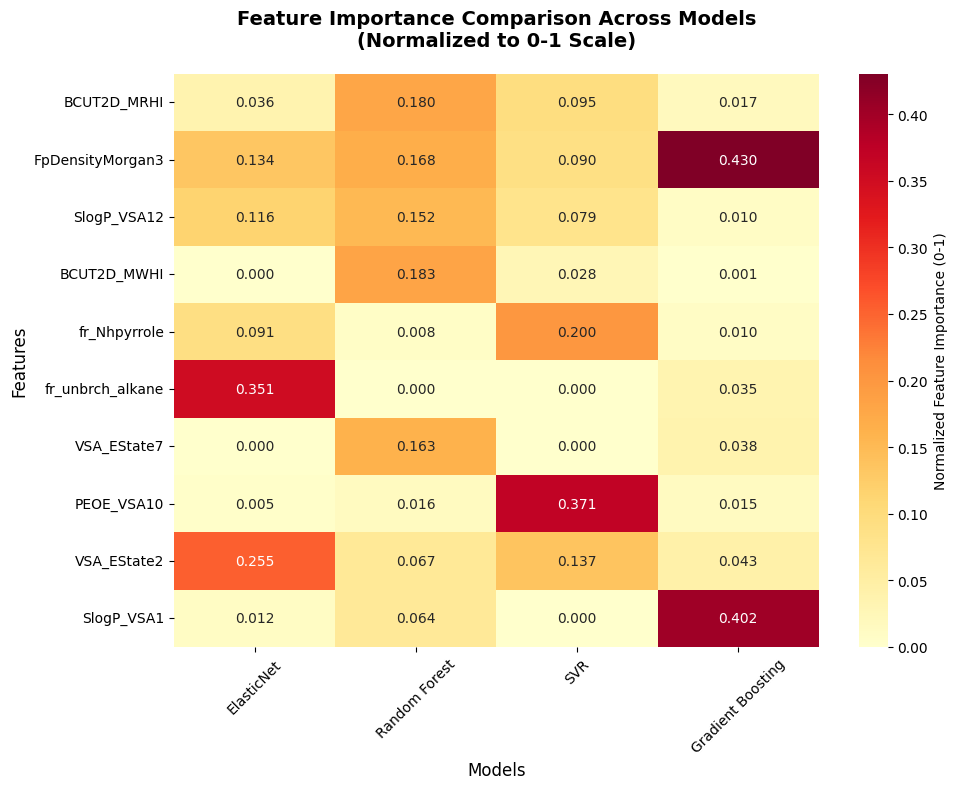


Top 5 Most Important Features by Model:

ElasticNet:
         feature  importance
fr_unbrch_alkane    3.153935
     VSA_EState2    2.289654
FpDensityMorgan3    1.206997
     SlogP_VSA12    1.038010
    fr_Nhpyrrole    0.815367

Random Forest:
         feature  importance
     BCUT2D_MWHI    0.183024
     BCUT2D_MRHI    0.179545
FpDensityMorgan3    0.167671
     VSA_EState7    0.162849
     SlogP_VSA12    0.152236

SVR:
         feature  importance
      PEOE_VSA10    0.440796
    fr_Nhpyrrole    0.238326
     VSA_EState2    0.162291
     BCUT2D_MRHI    0.113339
FpDensityMorgan3    0.106851

Gradient Boosting:
         feature  importance
FpDensityMorgan3    0.430335
      SlogP_VSA1    0.401879
     VSA_EState2    0.042718
     VSA_EState7    0.037638
fr_unbrch_alkane    0.034631


In [15]:
# 5. Feature importance analysis for all models
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance

# Get feature importance for each model
feature_importances = {}

for name, model in models.items():
    print(f"Processing {name}...")
    
    # Handle pipeline models (Ridge, Lasso, ElasticNet, SVR, etc.)
    if isinstance(model, Pipeline):
        regressor = model.named_steps['regressor']
        if hasattr(regressor, 'coef_'):
            # Linear models with coefficients
            importances = np.abs(regressor.coef_)
            feature_importances[name] = pd.DataFrame({
                'feature': feature_cols_selected,
                'importance': importances
            }).sort_values('importance', ascending=False)
        else:
            # For non-linear models in pipeline (like SVR with RBF kernel)
            # Use permutation importance
            perm_importance = permutation_importance(model, X_test, y_test, 
                                                   n_repeats=10, random_state=21, 
                                                   scoring='r2')
            importances = perm_importance.importances_mean
            feature_importances[name] = pd.DataFrame({
                'feature': feature_cols_selected,
                'importance': importances
            }).sort_values('importance', ascending=False)
    # Handle regular models (Random Forest)
    elif hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        feature_importances[name] = pd.DataFrame({
            'feature': feature_cols_selected,
            'importance': importances
        }).sort_values('importance', ascending=False)
    else:
        # Fallback to permutation importance for any other model type
        perm_importance = permutation_importance(model, X_test, y_test, 
                                               n_repeats=10, random_state=21, 
                                               scoring='r2')
        importances = perm_importance.importances_mean
        feature_importances[name] = pd.DataFrame({
            'feature': feature_cols_selected,
            'importance': importances
        }).sort_values('importance', ascending=False)

print(f"\nFeature importances calculated for {len(feature_importances)} models:")
print(list(feature_importances.keys()))

# Create normalized feature importance matrix for heatmap
all_features = feature_cols_selected
importance_matrix = pd.DataFrame(index=all_features)

for model_name, importance_df in feature_importances.items():
    # Normalize importances to 0-1 scale for each model
    importances = importance_df.set_index('feature')['importance']
    # Handle negative values from permutation importance
    importances = np.maximum(importances, 0)
    if importances.sum() > 0:
        normalized_importances = importances / importances.sum()
    else:
        normalized_importances = importances * 0
    importance_matrix[model_name] = normalized_importances.reindex(all_features, fill_value=0)

# Create heatmap with dynamic figure size based on number of models
n_models = len(feature_importances)
fig_width = max(10, 2.5 * n_models)
fig, ax = plt.subplots(figsize=(fig_width, 8))

sns.heatmap(importance_matrix, 
            annot=True, 
            fmt='.3f',
            cmap='YlOrRd',
            cbar_kws={'label': 'Normalized Feature Importance (0-1)'},
            ax=ax)

ax.set_title('Feature Importance Comparison Across Models\n(Normalized to 0-1 Scale)', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_ylabel('Features', fontsize=12)
ax.set_xlabel('Models', fontsize=12)
ax.tick_params(axis='y', rotation=0)
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print top 5 features for each model
print("\nTop 5 Most Important Features by Model:")
print("=" * 60)
for model_name, importance_df in feature_importances.items():
    print(f"\n{model_name}:")
    print(importance_df.head().to_string(index=False))

#### Plot testing sets

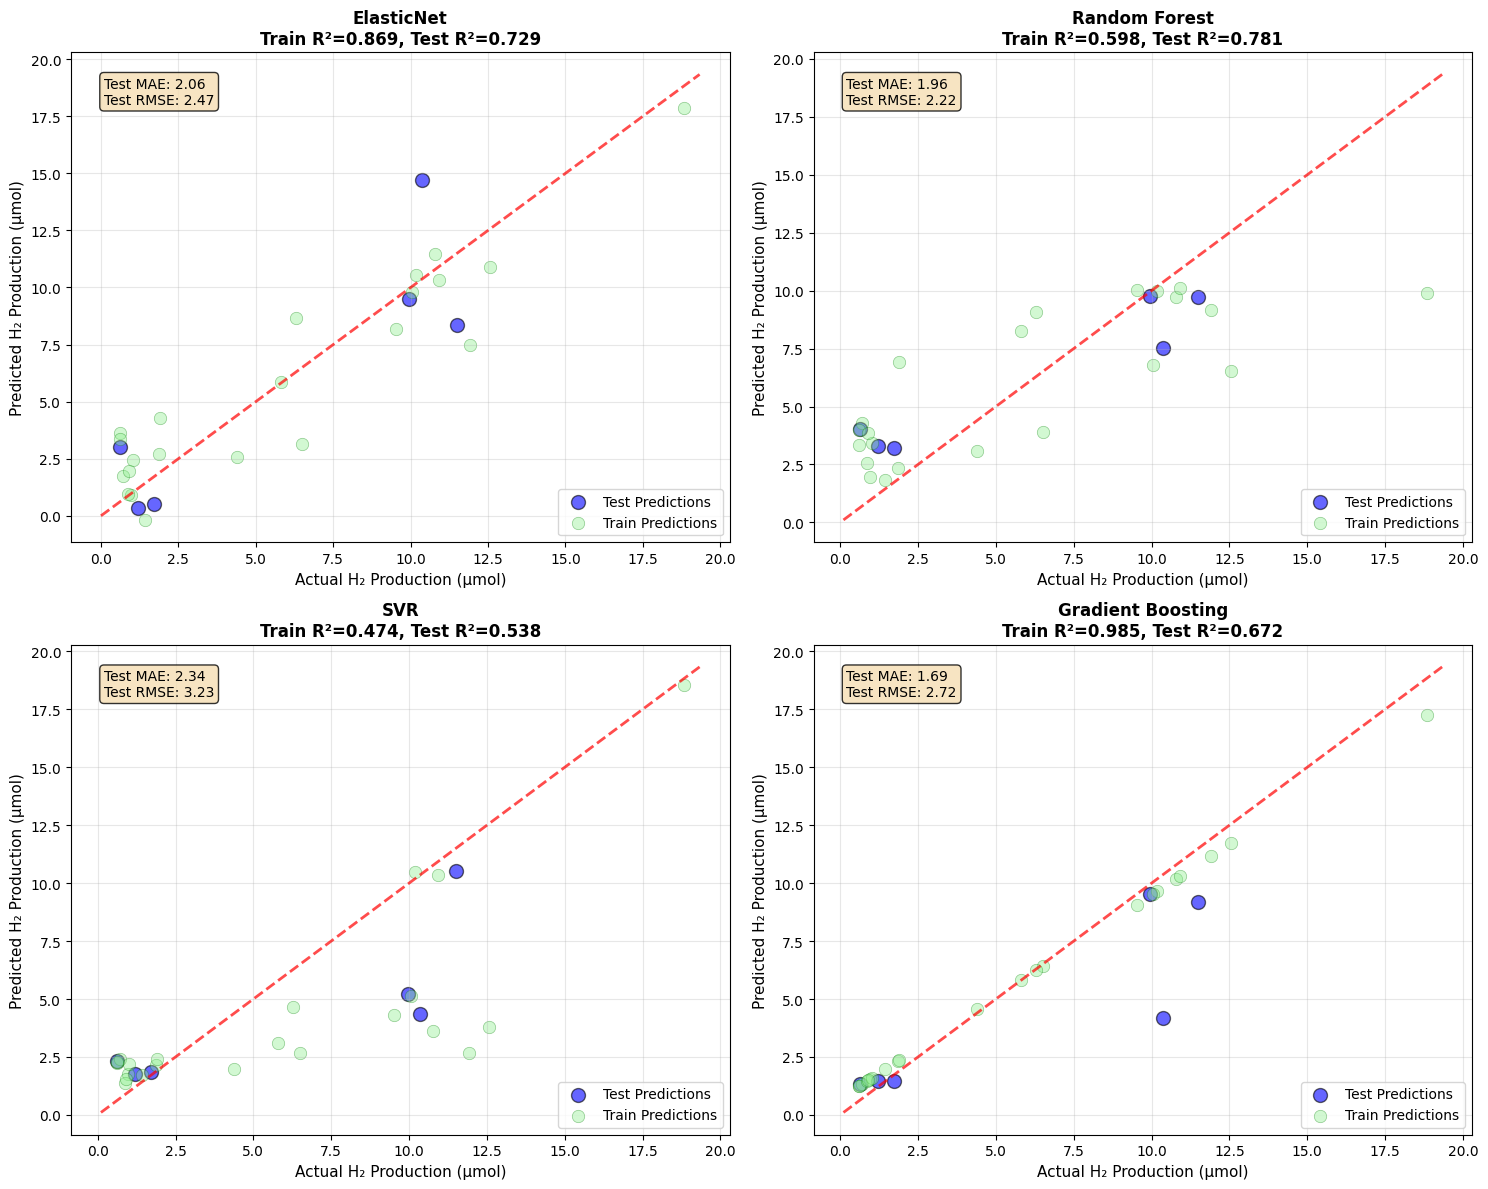


Model Performance Summary:
Model                | Train R² |  Test R² |      MAE |     RMSE
ElasticNet           |    0.869 |    0.729 |     2.06 |     2.47
Random Forest        |    0.598 |    0.781 |     1.96 |     2.22
SVR                  |    0.474 |    0.538 |     2.34 |     3.23
Gradient Boosting    |    0.985 |    0.672 |     1.69 |     2.72


In [16]:
# 6. Model validation and visualization for all models
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, (model_name, model) in enumerate(models.items()):
    # Get predictions
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    
    # Actual vs Predicted
    axes[idx].scatter(y_test, y_pred, color='blue', alpha=0.6, s=100, 
                     label='Test Predictions', edgecolors='black', linewidth=1)
    axes[idx].scatter(y_train, y_pred_train, color='lightgreen', alpha=0.4, s=80,
                     label='Train Predictions', edgecolors='green', linewidth=0.5)
    
    axes[idx].set_xlabel('Actual H₂ Production (μmol)', fontsize=11)
    axes[idx].set_ylabel('Predicted H₂ Production (μmol)', fontsize=11)
    axes[idx].set_title(f'{model_name}\nTrain R²={r2_train:.3f}, Test R²={r2_test:.3f}', 
                        fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].legend(loc='lower right')

    # Perfect prediction line
    all_vals = np.concatenate([y_train, y_test, y_pred, y_pred_train])
    min_val = max(0, all_vals.min() - 0.5)
    max_val = all_vals.max() + 0.5
    axes[idx].plot([min_val, max_val], [min_val, max_val], 
                   'r--', alpha=0.7, linewidth=2, label='Perfect Prediction')
    
    # Add metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    axes[idx].text(0.05, 0.95, f'Test MAE: {mae:.2f}\nTest RMSE: {rmse:.2f}', 
                   transform=axes[idx].transAxes, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
                   fontsize=10)

plt.tight_layout()
plt.show()

# Print summary comparison
print("\nModel Performance Summary:")
print("=" * 80)
print(f"{'Model':<20} | {'Train R²':>8} | {'Test R²':>8} | {'MAE':>8} | {'RMSE':>8}")
print("=" * 80)
for model_name in models.keys():
    y_pred = models[model_name].predict(X_test)
    y_pred_train = models[model_name].predict(X_train)
    
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{model_name:<20} | {train_r2:8.3f} | {test_r2:8.3f} | {mae:8.2f} | {rmse:8.2f}")